### Figure 2
 

In [20]:
## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import metrics
from scipy import stats

## All areas

In [3]:
# paths to load data
pathData = '/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/'
pathFln = '/home/ronaldo/github/ProjectUfabc/MouseKennedySNN/Data/Connectome/Kennedy.mat'

# Number of areas
Nareas=19
# Numver of trials
Ntrials=10

#### FLN

In [5]:
# Structural Connectivity
# Fln
# load FLNs
conn = loadmat(pathFln)
fln=conn['Fln']

#### GPDC Total

In [10]:
# Gpdc (Downsample 1kHz)

# matrix to store gpdc values
gpdcMatrixAUC=np.zeros((Nareas,Nareas,Ntrials)) #(i->j)
gpdcMatrixMean=np.zeros((Nareas,Nareas,Ntrials)) #(i->j)


for i in range(Ntrials):
    #  load GPDC
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdc.npz')
    # gpdc values
    gpdc=data['arr_1']
    # take mean of gpdc 
    gpdcMatrixMean[:,:,i]=np.mean(gpdc[:,:,:],axis=2).T
    
    # take auc of gpdc
    for k in range(Nareas):
        for l in range(Nareas):
            gpdcMatrixAUC[k,l,i]=metrics.auc(data['arr_0'],gpdc[l,k,:])


#### FLN vs GPDC Total peak   (All FLN including those equal to zero)

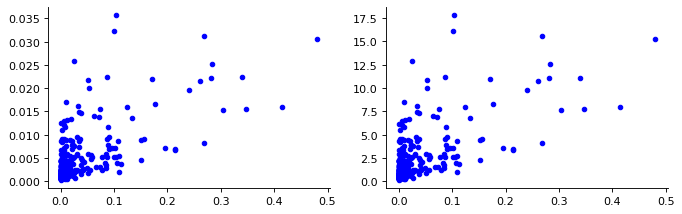

In [30]:
# define figure size
fig=plt.figure(figsize=(10, 3), dpi= 80, facecolor='w', edgecolor='k')

# remove right and top axis
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# correlation
listCorrelationMean=[]
listCorrelationAuc=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    # list to store FLN values
    listFln=[]
    # list to store GPDC values 
    listGpdcAuc=[]
    listGpdcMean=[]
    
    for i in range(Nareas):
        for j in range(Nareas):
            if i!=j:

                listFln.append(fln[i,j])
                listGpdcMean.append(gpdcMatrixMean[i,j,seed])
                listGpdcAuc.append(gpdcMatrixAUC[i,j,seed])
    
    if seed==4:
        # Plot scatter plot
        plt.subplot(121)
        plt.plot(listFln,listGpdcMean,'.b', markersize=8)
        plt.subplot(122)
        plt.plot(listFln,listGpdcAuc,'.b', markersize=8)
    
    listCorrelationMean.append(stats.pearsonr(listFln,listGpdcMean)[0])
    listCorrelationAuc.append(stats.pearsonr(listFln,listGpdcAuc)[0])


#### Average correlation between FLN and GPDC

In [33]:
df=pd.DataFrame({'AUC':listCorrelationAuc,'Mean':listCorrelationMean })

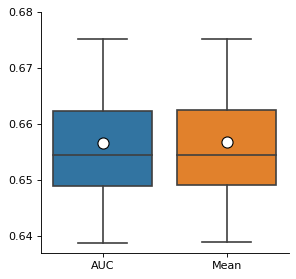

In [36]:
fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.boxplot(data=df,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yticks([0.64,0.65,0.66,0.67,0.68])
plt.savefig('boxplotSupplementary.svg', format='svg', dpi=100)

In [39]:
np.mean(listCorrelationMean)

0.6566746043101078

In [62]:
np.mean(listCorrelation)

0.7415986908639629

In [8]:
data.files

['arr_0', 'arr_1']

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [29]:
listCorrelationAuc

[0.6627354295503038]